# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
symbol = 'SPY'
symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [4]:
use_adj = True

Define high low trade periods

In [5]:
sma_period = 200
percent_band = 3.5

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [7]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2003-04-22,909.50,2004-08-06,1063.50,154.00,1540.00,10,1540.00,LONG,ES=F
1,2004-11-04,1160.50,2007-11-19,1437.50,277.00,2493.00,9,4033.00,LONG,ES=F
2,2009-07-15,927.25,2010-05-26,1061.25,134.00,2010.00,15,6043.00,LONG,ES=F
3,2010-10-05,1154.75,2011-08-04,1198.75,44.00,572.00,13,6615.00,LONG,ES=F
4,2012-01-18,1302.25,2015-08-21,1971.50,669.25,8031.00,12,14646.00,LONG,ES=F
5,2016-04-18,2086.75,2018-10-24,2664.25,577.50,6352.50,11,20998.50,LONG,ES=F
6,2019-03-21,2862.50,2020-02-27,2957.00,94.50,945.00,10,21943.50,LONG,ES=F
7,2020-06-05,3186.75,2020-10-16,3462.25,275.50,2755.00,10,24698.50,LONG,ES=F


In [9]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-10-12,35486.00,34718.50,35403.50,10,76.00,1.00,-
2020-10-13,35433.50,34991.00,35123.50,10,76.00,1.00,-
2020-10-14,35316.00,34796.00,34886.00,10,76.00,1.00,-
2020-10-15,34941.00,34391.00,34831.00,10,76.00,1.00,-
2020-10-16,34698.50,34698.50,34698.50,0,34698.50,1.00,X


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                   2001-07-03
end                                                     2020-10-16
beginning_balance                                            10000
ending_balance                                            34698.50
total_net_profit                                          24698.50
gross_profit                                              24698.50
gross_loss                                                    0.00
profit_factor                                                 1000
return_on_initial_capital                                   246.99
annual_return_rate                                            6.66
trading_period                           19 years 3 months 13 days
pct_time_in_market                                           69.88
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, s.use_adj)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

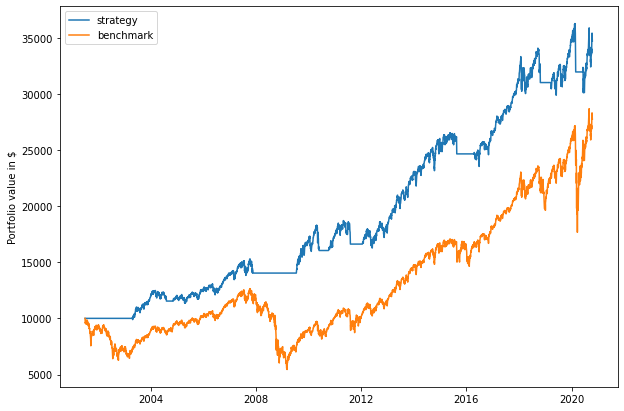

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

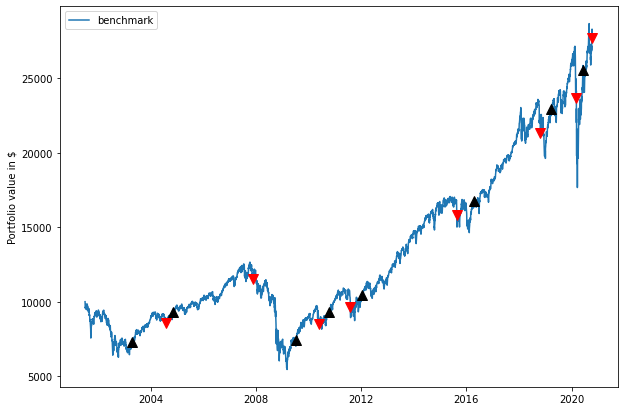

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

In [14]:
print('trading period:  {} to {}'.format(stats['start'], stats['end']))
df = pf.summary(stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  2001-07-03 to 2020-10-16


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$34,698.50","$27,736.00"
total_net_profit,"$24,698.50","$17,736.00"
gross_profit,"$24,698.50","$17,736.00"
gross_loss,$0.00,$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.66,5.43
max_closed_out_drawdown,-17.01,-56.94
annualized_return_over_max_drawdown,0.39,0.10
best_month,9.81,29.19
worst_month,-11.88,-29.02
sharpe_ratio,0.68,0.36
sortino_ratio,0.69,0.44
monthly_std,2.58,4.66
annual_std,8.41,15.62


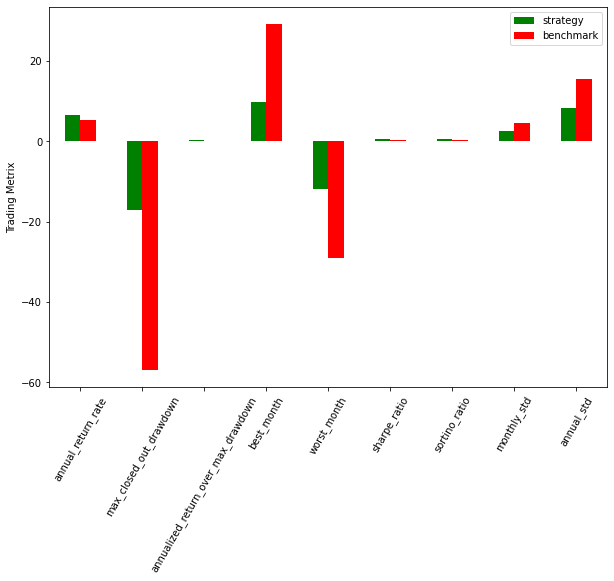

In [15]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Print the raw transaction log

In [16]:
pd.set_option('display.max_rows', len(rlog))
rlog

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2003-04-22,0,909.50,10,entry,LONG,ES=F
1,2004-08-06,1,1063.50,10,exit,LONG,ES=F
2,2004-11-04,2,1160.50,9,entry,LONG,ES=F
3,2007-11-19,3,1437.50,9,exit,LONG,ES=F
4,2009-07-15,4,927.25,15,entry,LONG,ES=F
5,2010-05-26,5,1061.25,15,exit,LONG,ES=F
6,2010-10-05,6,1154.75,13,entry,LONG,ES=F
7,2011-08-04,7,1198.75,13,exit,LONG,ES=F
8,2012-01-18,8,1302.25,12,entry,LONG,ES=F
9,2015-08-21,9,1971.50,12,exit,LONG,ES=F
